# Step 1 : Gather Data

In [ ]:
#import data from sources
import pandas as pd
import requests
import os
import pathlib
from pathlib import Path
from datetime import datetime



# Collect EIA Government  
Collection of raw data from the eia.gov website   
- pulling
- 

# Optimizing Curve Fit of Net Energy Curve based on Time and Price  


In [14]:
from pandas import read_csv
import pandas as pd
import numpy, scipy, scipy.optimize
import matplotlib
from mpl_toolkits.mplot3d import  Axes3D
from matplotlib import cm # to colormap 3D surfaces from blue to red
import matplotlib.pyplot as plt

graphWidth = 800 # units are pixels
graphHeight = 600 # units are pixels

# 3D contour plot lines
numberOfContourLines = 16

# load the dataset
dataframe = read_csv(
    "/Users/HXL0TP5/Repos/PHD/Research Simulations/smartgrid_coop_research/simulation_notebook/data/prosumer_N50_all_20210409_00.csv", header=0)
df_by_id = dataframe[["time", "price", "net_energy", "id"]].groupby("id")
for df in df_by_id:
    #data = df[["time", "price"]].values
    xData = pd.to_datetime(df[1]["time"]).astype(int)/ 10**9
    yData = df[1]["price"].values
    zData = df[1]["net_energy"].values
    print([xData,yData,zData])  
    break

# place the data in a single list
data = [xData, yData, zData]




[72000    1.606781e+09
72001    1.604189e+09
72002    1.601510e+09
72003    1.598918e+09
72004    1.596240e+09
             ...     
74935    1.580515e+09
74936    1.577837e+09
74937    1.575158e+09
74938    1.572566e+09
74939    1.569888e+09
Name: time, Length: 2940, dtype: float64, array([11.86, 12.  , 11.71, ..., 11.62, 12.09, 11.66]), array([ -68.3152973 , -120.99028126,  -87.76897346, ...,  -45.41448486,
          0.        ,    0.        ])]


/var/folders/7f/37xm8f492kvg0f2w5jh9hc000000gp/T/ipykernel_19568/686702495.py:21: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  xData = pd.to_datetime(df[1]["time"]).astype(int)/ 10**9


In [15]:

def SurfacePlot(func, data, fittedParameters):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)

    matplotlib.pyplot.grid(True)
    axes = Axes3D(f)

    # extract data from the single list
    x_data = data[0]
    y_data = data[1]
    z_data = data[2]

    xModel = numpy.linspace(min(x_data), max(x_data), 20)
    yModel = numpy.linspace(min(y_data), max(y_data), 20)
    X, Y = numpy.meshgrid(xModel, yModel)

    Z = func(numpy.array([X, Y]), *fittedParameters)

    axes.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=1, antialiased=True)

    axes.scatter(x_data, y_data, z_data) # show data along with plotted surface

    axes.set_title('Surface Plot (click-drag with mouse)') # add a title for surface plot
    axes.set_xlabel('X Data') # X axis data label
    axes.set_ylabel('Y Data') # Y axis data label
    axes.set_zlabel('Z Data') # Z axis data label

    plt.show()
    plt.close('all') # clean up after using pyplot or else there can be memory and process problems


def ContourPlot(func, data, fittedParameters):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
    axes = f.add_subplot(111)

    # extract data from the single list
    x_data = data[0]
    y_data = data[1]
    z_data = data[2]

    xModel = numpy.linspace(min(x_data), max(x_data), 20)
    yModel = numpy.linspace(min(y_data), max(y_data), 20)
    X, Y = numpy.meshgrid(xModel, yModel)

    Z = func(numpy.array([X, Y]), *fittedParameters)

    axes.plot(x_data, y_data, 'o')

    axes.set_title('Contour Plot') # add a title for contour plot
    axes.set_xlabel('X Data') # X axis data label
    axes.set_ylabel('Y Data') # Y axis data label

    CS = matplotlib.pyplot.contour(X, Y, Z, numberOfContourLines, colors='k')
    matplotlib.pyplot.clabel(CS, inline=1, fontsize=10) # labels for contours

    plt.show()
    plt.close('all') # clean up after using pyplot or else there can be memory and process problems


def ScatterPlot(data):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)

    matplotlib.pyplot.grid(True)
    axes = Axes3D(f)

    # extract data from the single list
    x_data = data[0]
    y_data = data[1]
    z_data = data[2]

    axes.scatter(x_data, y_data, z_data)

    axes.set_title('Scatter Plot (click-drag with mouse)')
    axes.set_xlabel('X Data')
    axes.set_ylabel('Y Data')
    axes.set_zlabel('Z Data')

    plt.show()
    plt.close('all') # clean up after using pyplot or else there can be memory and process problems


def func(data, a1, a2, b):

    # extract data from the single list
    x1 = data[0]
    x2 = data[1]

    return (a1/x1)+a2*x2+b


/usr/local/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/7f/37xm8f492kvg0f2w5jh9hc000000gp/T/ipykernel_19568/1847239830.py:63: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  axes = Axes3D(f)


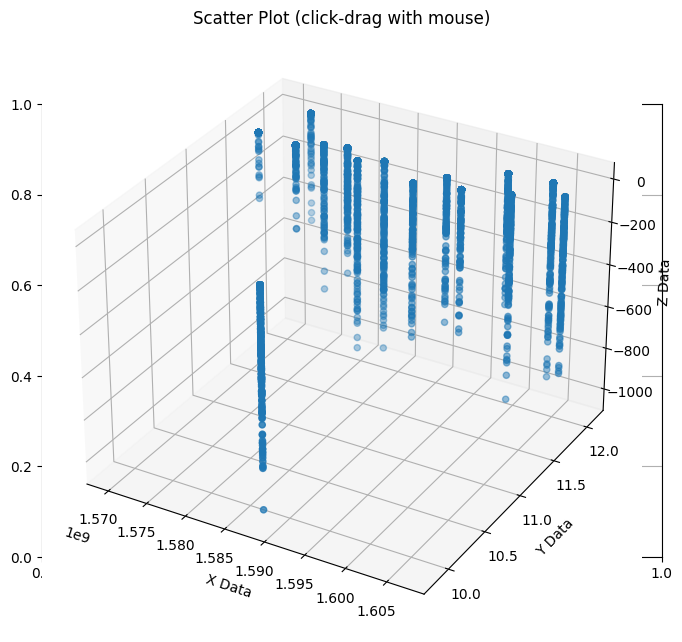

/var/folders/7f/37xm8f492kvg0f2w5jh9hc000000gp/T/ipykernel_19568/1847239830.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  axes = Axes3D(f)


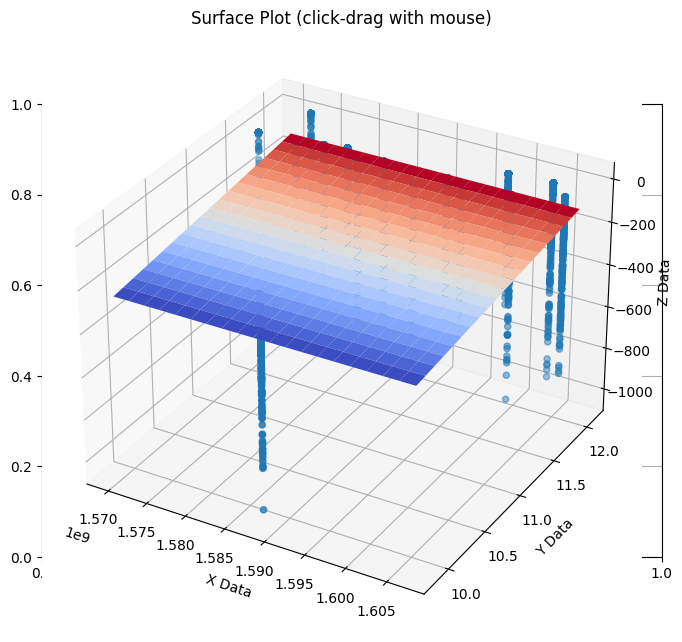

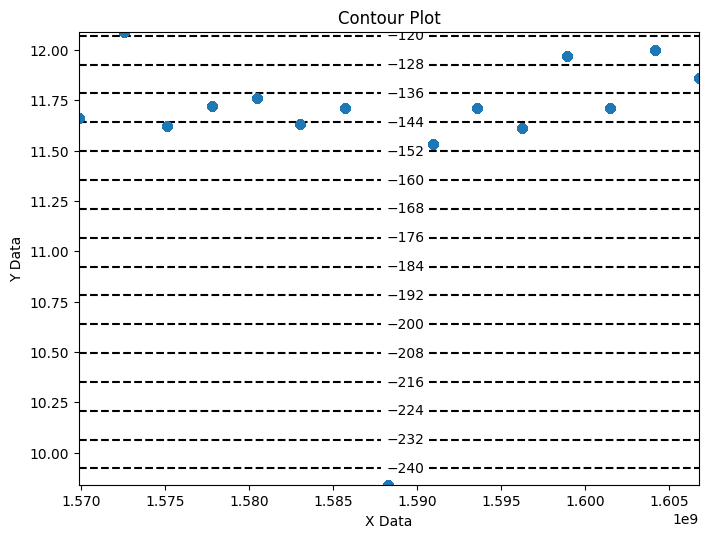

fitted parameters [   1.           55.83789715 -793.94921303]
RMSE: 195.27765009708392
R-squared: 0.020170556516722393


In [16]:
if __name__ == "__main__":    
    initialParameters = [1.0, 1.0, 1.0] # these are the same as scipy default values in this example

    # here a non-linear surface fit is made with scipy's curve_fit()
    fittedParameters, pcov = scipy.optimize.curve_fit(func, [xData, yData], zData, p0 = initialParameters)

    ScatterPlot(data)
    SurfacePlot(func, data, fittedParameters)
    ContourPlot(func, data, fittedParameters)

    print('fitted parameters', fittedParameters)

    modelPredictions = func(data, *fittedParameters) 

    absError = modelPredictions - zData

    SE = numpy.square(absError) # squared errors
    MSE = numpy.mean(SE) # mean squared errors
    RMSE = numpy.sqrt(MSE) # Root Mean Squared Error, RMSE
    Rsquared = 1.0 - (numpy.var(absError) / numpy.var(zData))
    print('RMSE:', RMSE)
    print('R-squared:', Rsquared)